#### Objective: Analyze job market trends in data-related roles by exploring required skills, job demand, and salary distributions to help entry-level candidates understand which skills are most valuable.

#### 1. Project Title: Global Data Job Market Analysis: Roles, Skills, and Salaries

#### 2. Core Problem This Project Answers: How do job roles, required skills, and salaries in the data field vary across experience levels, locations, and time?

#### 4. Dataset Overview

##### i. Jobs Dataset:
###### Number of rows: 12217       ,              Number of columns: 15
###### Any obvious issues (missing values, weird names): No
###### What each column representing:
###### job_link: Unique URL or identifier for a job posting. This is primary key. It links this dataset to job_skills.csv.
###### last_processed_time: The last time this job posting was processed by the system or scraper.
###### last_status: Status of the job at last check. For example: active, expired, closed.
###### got_summary: Boolean flag (True/False). Indicates whether a job description summary was successfully extracted.
###### got_ner: Boolean flag. Shows whether Named Entity Recognition was applied. This usually means skills, locations, or roles were auto-extracted.
###### is_being_worked: Internal processing flag. Not analytically useful. You’ll likely ignore this.
###### job_title: Title of the job. Example: Data Analyst, ML Engineer.
###### company: Name of the hiring company.
###### job_location: Location of the job posting. Often a city or region.
###### first_seen: Date when this job posting was first detected.
###### search_city: City used in the job search query. Important distinction: not always the same as job_location.
###### search_country: Country used in the search query.
###### search_position: Role searched for (e.g., “Data Scientist”). Useful to study demand trends.
###### job_level: Seniority level. Example: Junior, Mid, Senior.
###### job_type: Employment type. Example: Full-time, Contract, Internship.

##### ii. Skills Dataset
###### Number of rows: 12217, Number of columns: 2
###### What each column represents:       job_skills: A skill required or mentioned in the job description. One job can appear multiple times here, each with a different skill.
###### Any obvious issues (missing values, weird names): No

##### iii. Salaries Dataset 
###### Number of rows: 607, Number of columns: 12
###### What each column represents:
###### Unnamed: 0: Just an index column. Useless. You will drop this.
###### work_year: Year the salary data corresponds to.
###### experience_level: Experience tier. Usually: EN (Entry), MI (Mid), SE (Senior),EX (Executive)
###### employment_type: Nature of employment: FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)
###### job_title: Job role title.
###### salary: Salary amount in original currency.
###### salary_currency: Currency used. Example: USD, EUR.
###### salary_in_usd: Salary converted into USD. This is the column you must use for comparisons.
###### employee_residence: Country where the employee lives.
###### remote_ratio: Remote work percentage: 0 = On-site, 50 = Hybrid, 100 = Fully remote
###### company_location: Country where the company is based.
###### company_size: Size of company: S = Small, M = Medium, L = Large
###### Any obvious issues (missing values, weird names etc): Has few duplicates

#### 5. Dataset Load and Clean

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
jobs = pd.read_csv("job_postings.csv")
jobs.head(1)

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite


In [4]:
jobs.info()

<class 'pandas.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_link             12217 non-null  str  
 1   last_processed_time  12217 non-null  str  
 2   last_status          12217 non-null  str  
 3   got_summary          12217 non-null  str  
 4   got_ner              12217 non-null  str  
 5   is_being_worked      12217 non-null  str  
 6   job_title            12217 non-null  str  
 7   company              12217 non-null  str  
 8   job_location         12216 non-null  str  
 9   first_seen           12217 non-null  str  
 10  search_city          12217 non-null  str  
 11  search_country       12217 non-null  str  
 12  search_position      12217 non-null  str  
 13  job_level            12217 non-null  str  
 14  job_type             12217 non-null  str  
dtypes: str(15)
memory usage: 1.4 MB


In [5]:
jobs.isnull().sum()
jobs.duplicated().sum()

np.int64(0)

In [6]:
skills = pd.read_csv("job_skills.csv")
skills.head(1)

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."


In [7]:
skills.info()

<class 'pandas.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   job_link    12217 non-null  str  
 1   job_skills  12212 non-null  str  
dtypes: str(2)
memory usage: 191.0 KB


In [8]:
skills.isnull().sum()
skills.duplicated().sum()

np.int64(0)

In [9]:
skills['job_skills'].value_counts().head(1)

job_skills
data representation, data analysis, SQL, data analytics, analytics, python (programming language), data mining, data science, r (programming language), tableau, analytical skills, data visualization, databases, business analysis, business intelligence (bi), microsoft sql server, machine learning, statistics, microsoft power bi, java, finance, shopee, traveloka, google, facebook, ctrip, trip.com, makemytrip, grab, amazon, pandas (software), artificial intelligence (ai), information technology, capital one, accenture, upwork, deloitte, mckinsey, bain, microsoft, uber, lyft, gojek, lazada, alibaba, shopify, expedia, skyscanner    3
Name: count, dtype: int64

##### Skill Extraction Process: Job postings listed multiple skills in a single field. These skills should split and normalized so that each skill could be analyzed independently. This ensured accurate frequency analysis and prevented misleading counts.

In [10]:
#The job_skills column contains multiple skills in a single row, so separated by commas
skills['job_skills'] = skills['job_skills'].str.lower()
skills['job_skills'] = skills['job_skills'].str.split(',')

In [11]:
#creates one skill per row
skills_exploded = skills.explode('job_skills')
#Clean extra spaces
skills_exploded['job_skills'] = skills_exploded['job_skills'].str.strip()

In [12]:
salaries = pd.read_csv("data_science_job_salaries.csv")
salaries.drop(columns=["Unnamed: 0"], inplace=True)
salaries.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


In [13]:
salaries.info()

<class 'pandas.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           607 non-null    int64
 1   experience_level    607 non-null    str  
 2   employment_type     607 non-null    str  
 3   job_title           607 non-null    str  
 4   salary              607 non-null    int64
 5   salary_currency     607 non-null    str  
 6   salary_in_usd       607 non-null    int64
 7   employee_residence  607 non-null    str  
 8   remote_ratio        607 non-null    int64
 9   company_location    607 non-null    str  
 10  company_size        607 non-null    str  
dtypes: int64(4), str(7)
memory usage: 52.3 KB


In [14]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [15]:
salaries.isnull().sum()
salaries.duplicated().sum()

np.int64(42)

In [16]:
duplicate_rows = salaries[salaries.duplicated(keep=False)]
duplicate_rows.sort_values(by='job_title').head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
406,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
393,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
392,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
527,2022,SE,FT,Data Analyst,135000,USD,135000,US,100,US,M


##### Duplicate Handling: These rows should remove to prevent distortion of salary statistics and ensure data integrity.

In [17]:
salaries.drop_duplicates(inplace=True)
salaries.duplicated().sum()

np.int64(0)

In [18]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,565.000000,5.650000e+02,565.000000,565.000000
mean,2021.364602,3.381160e+05,110610.343363,69.911504
std,0.698138,1.599879e+06,72280.702792,40.900666
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.700000e+04,60757.000000,50.000000
50%,2021.000000,1.109250e+05,100000.000000,100.000000
75%,2022.000000,1.650000e+05,150000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


#### 6. Exploratory Data Analysis

##### Experience Level

In [19]:
salaries['experience_level'].value_counts()

experience_level
SE    243
MI    208
EN     88
EX     26
Name: count, dtype: int64

##### Which role's dominate in the market?

In [20]:
jobs['job_title'].value_counts().head(10)

job_title
Senior Data Engineer                         285
Senior Data Analyst                          163
Data Engineer                                149
Senior MLOps Engineer                        138
Data Analyst                                 137
Data Scientist                               128
Lead Data Engineer                           123
Senior Data Scientist                        119
Data Architect                               111
Staff Machine Learning Engineer, Series A    101
Name: count, dtype: int64

##### Answer: Senior Data Engineer (285) is more dominate in market.

##### Which Top 15 skills are in-demand?

In [21]:
#Skills Frequency
top_skills = skills_exploded['job_skills'].value_counts().head(15)
top_skills

job_skills
python                  4810
sql                     4610
data analysis           3293
machine learning        2684
communication           2506
data visualization      2330
aws                     1740
project management      1737
data engineering        1714
communication skills    1712
tableau                 1705
data science            1691
r                       1544
data modeling           1520
data management         1470
Name: count, dtype: int64

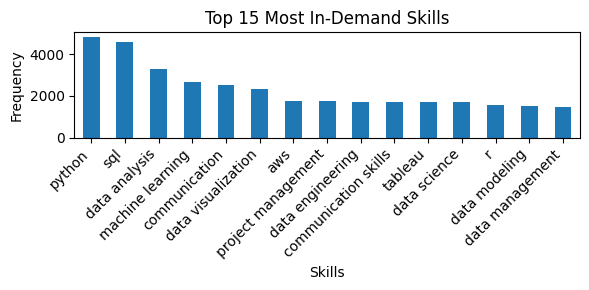

In [22]:
#Bar Chart
plt.figure(figsize=(6,3))
top_skills.plot(kind='bar')
plt.title('Top 15 Most In-Demand Skills')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Top 15 Skills Diatribution

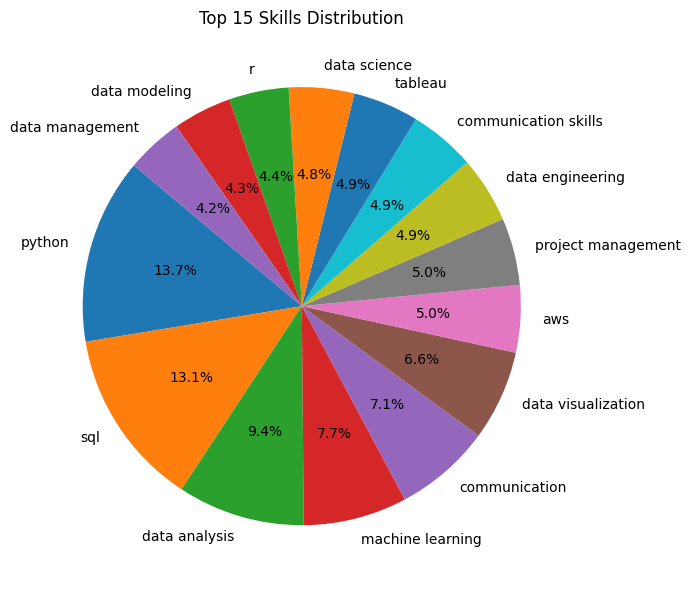

In [23]:
#Pie Chart
plt.figure(figsize=(7,7))
top_skills.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Top 15 Skills Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

##### Which experience level pays the most?

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

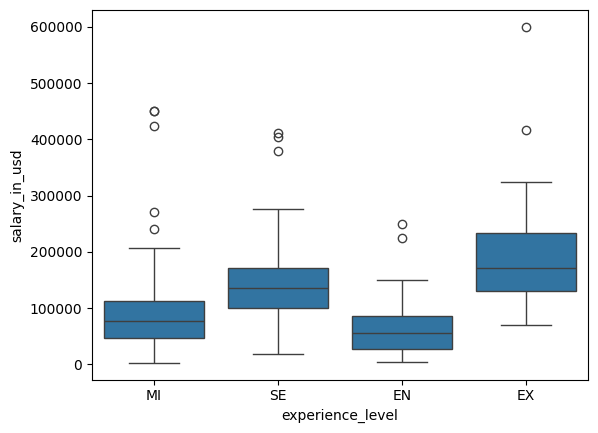

In [24]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=salaries)

##### How to read one box
###### Middle line inside the box → median salary (the “typical” value)
###### Box itself → middle 50% of salaries (25th to 75th percentile)
###### Whiskers → normal salary range (excluding outliers)
###### Dots outside whiskers → outliers (people paid way more or way less)

##### Answer: EX(Executive Level) pays the most

##### Which Job Role has high salary?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Scientist'),
  Text(2, 0, 'Big Data Engineer'),
  Text(3, 0, 'Machine Learning Engineer'),
  Text(4, 0, 'Data Analyst'),
  Text(5, 0, 'Data Engineer'),
  Text(6, 0, 'Data Science Consultant'),
  Text(7, 0, 'Research Scientist'),
  Text(8, 0, 'Data Science Manager'),
  Text(9, 0, 'Data Architect')])

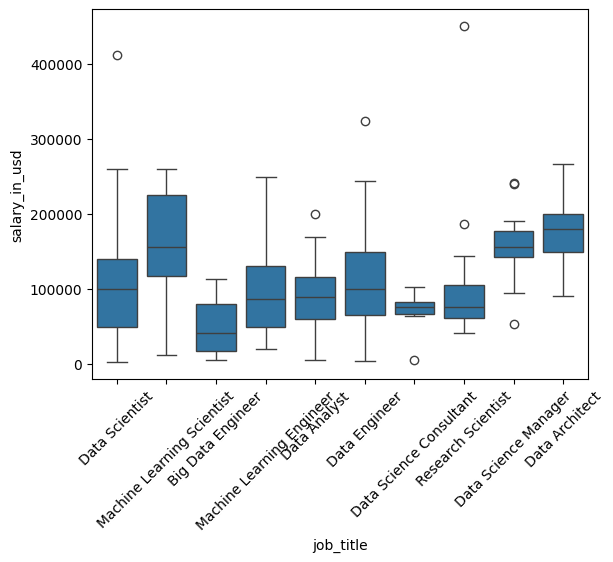

In [25]:
top_roles = salaries['job_title'].value_counts().head(10).index
sns.boxplot(
    data=salaries[salaries['job_title'].isin(top_roles)],
    x='job_title',
    y='salary_in_usd'
)
plt.xticks(rotation=45)

##### Highest-paying roles (on average): Data Architect, Data Science Manager, Research Scientist

##### Identify which skills are associated with higher-paying jobs?

In [26]:
# Keep only relevant columns
salary_subset = salaries[['job_title', 'salary_in_usd']]
salary_subset = salary_subset.dropna(subset=['salary_in_usd'])

In [27]:
# NORMALIZE JOB TITLES
def simplify_title(title):
    title = str(title).lower()
    if 'data analyst' in title:
        return 'Data Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'machine learning' in title or 'ml engineer' in title:
        return 'ML Engineer'
    else:
        return None

In [28]:
salary_subset['role'] = salary_subset['job_title'].apply(simplify_title)
salary_subset = salary_subset.dropna(subset=['role'])

jobs['role'] = jobs['job_title'].apply(simplify_title)
jobs = jobs.dropna(subset=['role'])

In [29]:
# Remove empty junk
skills_exploded = skills_exploded[skills_exploded['job_skills'] != '']

In [30]:
# MERGE SKILLS WITH JOB ROLES
jobs_subset = jobs[['job_link', 'role']]
skills_jobs = skills_exploded.merge(
    jobs_subset,
    on='job_link',
    how='inner'
)

In [31]:
# COMPUTE AVERAGE SALARY PER ROLE
role_salary = (
    salary_subset
    .groupby('role')['salary_in_usd']
    .mean()
    .reset_index()
)

In [32]:
# ATTACH ROLE SALARY TO SKILLS
skills_with_salary = skills_jobs.merge(
    role_salary,
    on='role',
    how='left'
)

In [33]:
# Remove skills that appear too rarely
skill_counts = skills_with_salary['job_skills'].value_counts()
common_skills = skill_counts[skill_counts >= 50].index

skills_with_salary = skills_with_salary[
    skills_with_salary['job_skills'].isin(common_skills)
]

In [34]:
# SKILLS VS SALARY (FINAL CALCULATION)
skill_salary = (
    skills_with_salary
    .groupby('job_skills')['salary_in_usd']
    .mean()
    .reset_index()
)

In [35]:
top_paying_skills = skill_salary.sort_values(
    by='salary_in_usd',
    ascending=False
).head(15)
top_paying_skills

,job_skills,salary_in_usd
214,supervised learning,111299.153771
142,mlops,111162.539357
141,mlflow,111129.106875
47,dask,111116.301465
223,torch,111101.137164
204,speech processing,111083.769544
155,numba,111081.783334
104,fda approvals,111077.742424
17,audio classification,111077.742424
143,model deployment,110975.534249


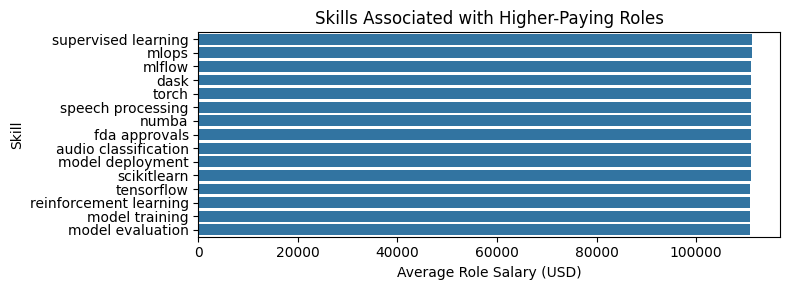

In [36]:
# VISUALIZATION
plt.figure(figsize=(8,3))
sns.barplot(
    data=top_paying_skills,
    x='salary_in_usd',
    y='job_skills'
)
plt.title('Skills Associated with Higher-Paying Roles')
plt.xlabel('Average Role Salary (USD)')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

##### Identify which skills are most common for Data Analyst, Data Scientist, and ML Engineer roles.

In [37]:
# Merge skills with job titles
jobs_subset = jobs[['job_link', 'job_title']]

skills_jobs = skills_exploded.merge(
    jobs_subset,
    on='job_link',
    how='inner'
)

In [38]:
skills_jobs['role'] = skills_jobs['job_title'].apply(simplify_title)
skills_jobs = skills_jobs.dropna(subset=['role'])

In [39]:
# Count skills per role
skill_role_counts = (
    skills_jobs
    .groupby(['role', 'job_skills'])
    .size()
    .reset_index(name='count')
)

##### For Data Analyst

In [40]:
skill_role_counts[
    skill_role_counts['role'] == 'Data Analyst'
].sort_values(by='count', ascending=False).head(10)


,role,job_skills,count
2746,Data Analyst,data analysis,1340
9810,Data Analyst,sql,1179
3437,Data Analyst,data visualization,1008
8551,Data Analyst,python,824
10351,Data Analyst,tableau,744
8670,Data Analyst,r,569
2155,Data Analyst,communication,545
8027,Data Analyst,power bi,460
3151,Data Analyst,data mining,383
8421,Data Analyst,project management,377


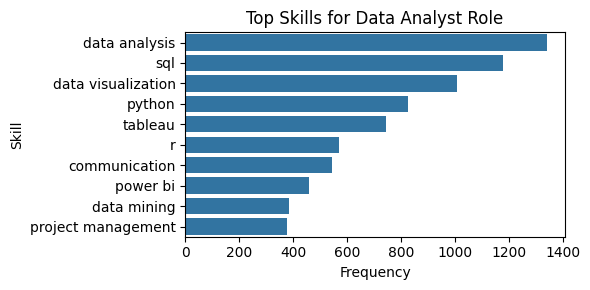

In [41]:
da_skills = skill_role_counts[
    skill_role_counts['role'] == 'Data Analyst'
].sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(6,3))
sns.barplot(data=da_skills, x='count', y='job_skills')
plt.title('Top Skills for Data Analyst Role')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

##### For Data Scientist

In [42]:
skill_role_counts[
    skill_role_counts['role'] == 'Data Scientist'
].sort_values(by='count', ascending=False).head(10)

,role,job_skills,count
15806,Data Scientist,python,681
14626,Data Scientist,machine learning,609
13067,Data Scientist,data science,557
16462,Data Scientist,sql,486
15869,Data Scientist,r,397
13158,Data Scientist,data visualization,315
16570,Data Scientist,statistics,308
12857,Data Scientist,data analysis,256
12576,Data Scientist,communication,204
12989,Data Scientist,data mining,184


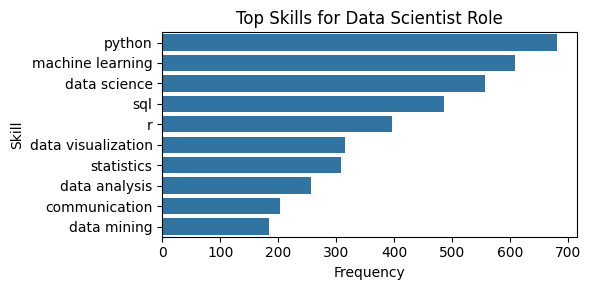

In [43]:
da_skills = skill_role_counts[
    skill_role_counts['role'] == 'Data Scientist'
].sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(6,3))
sns.barplot(data=da_skills, x='count', y='job_skills')
plt.title('Top Skills for Data Scientist Role')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

##### For ML Engineer

In [44]:
skill_role_counts[
    skill_role_counts['role'] == 'ML Engineer'
].sort_values(by='count', ascending=False).head(10)

,role,job_skills,count
19760,ML Engineer,machine learning,664
20788,ML Engineer,python,615
21612,ML Engineer,tensorflow,432
20792,ML Engineer,pytorch,377
18665,ML Engineer,deep learning,258
17750,ML Engineer,aws,234
19553,ML Engineer,java,186
17782,ML Engineer,azure,174
19609,ML Engineer,kubernetes,159
18098,ML Engineer,cloud computing,157


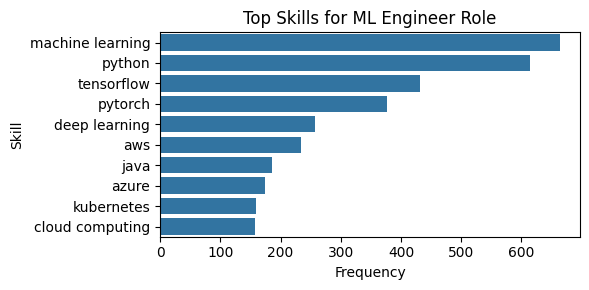

In [45]:
da_skills = skill_role_counts[
    skill_role_counts['role'] == 'ML Engineer'
].sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(6,3))
sns.barplot(data=da_skills, x='count', y='job_skills')
plt.title('Top Skills for ML Engineer Role')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

##### REMOTE vs ON-SITE vs SALARY

In [46]:
# Prepare the data
remote_salary = salaries[[
    'remote_ratio',
    'salary_in_usd'
]].dropna()

In [47]:
# Map remote ratio to readable labels
remote_map = {
    0: 'On-site',
    50: 'Hybrid',
    100: 'Fully Remote'
}

remote_salary['work_type'] = remote_salary['remote_ratio'].map(remote_map)

In [48]:
# Summary statistics
remote_salary.groupby('work_type')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
work_type,,,,,,,,
Fully Remote,346.0,120763.190751,74930.425808,4000.0,70000.0,110712.5,159750.00,600000.0
Hybrid,98.0,80721.897959,57639.096695,5409.0,50000.5,68010.5,99925.75,423000.0
On-site,121.0,105785.404959,68392.500340,2859.0,62000.0,98158.0,136000.00,450000.0


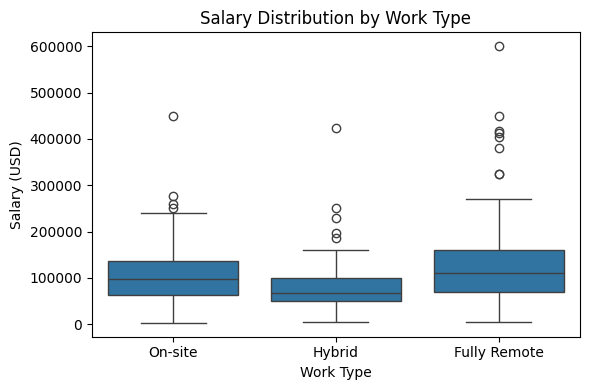

In [49]:
# Visualization
plt.figure(figsize=(6,4))
sns.boxplot(
    data=remote_salary,
    x='work_type',
    y='salary_in_usd'
)
plt.title('Salary Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

##### Which skills appear more often at different experience levels?

In [50]:
# Map experience level labels
exp_map = {
    'EN': 'Entry',
    'MI': 'Mid',
    'SE': 'Senior',
    'EX': 'Executive'
}

salaries['experience'] = salaries['experience_level'].map(exp_map)

In [51]:
# Keep only what we need
exp_roles = salaries[['job_title', 'experience']].dropna()

In [52]:
# Normalize job titles
exp_roles['role'] = exp_roles['job_title'].apply(simplify_title)
exp_roles = exp_roles.dropna(subset=['role'])

In [53]:
# Attach experience level to skills
skills_exp = skills_jobs.merge(
    exp_roles[['role', 'experience']],
    on='role',
    how='inner'
)

In [54]:
# Skill frequency by experience level
skill_exp_counts = (
    skills_exp
    .groupby(['experience', 'job_skills'])
    .size()
    .reset_index(name='count')
)

##### Top skills for Entry level

In [55]:
entry_skills = (
    skill_exp_counts[skill_exp_counts['experience'] == 'Entry']
    .sort_values(by='count', ascending=False)
    .head(10)
)

entry_skills

,experience,job_skills,count
14034,Entry,python,38281
16101,Entry,sql,33167
4657,Entry,data analysis,30166
10448,Entry,machine learning,28233
5557,Entry,data visualization,24913
14217,Entry,r,19406
5353,Entry,data science,19198
16919,Entry,tableau,16937
3718,Entry,communication,16127
16388,Entry,statistics,13700


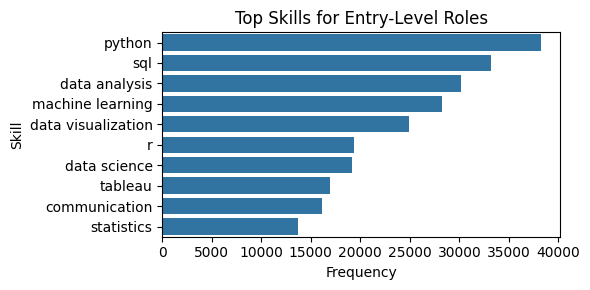

In [56]:
# Visualization
plt.figure(figsize=(6,3))
sns.barplot(
    data=entry_skills,
    x='count',
    y='job_skills'
)
plt.title('Top Skills for Entry-Level Roles')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

##### Top skills for Mid

In [57]:
Mid_skills = (
    skill_exp_counts[skill_exp_counts['experience'] == 'Mid']
    .sort_values(by='count', ascending=False)
    .head(10)
)

Mid_skills

,experience,job_skills,count
51030,Mid,python,91238
53097,Mid,sql,81253
41653,Mid,data analysis,72403
47444,Mid,machine learning,66567
42553,Mid,data visualization,61115
42349,Mid,data science,48936
51213,Mid,r,48846
53915,Mid,tableau,41388
40714,Mid,communication,38527
53384,Mid,statistics,34304


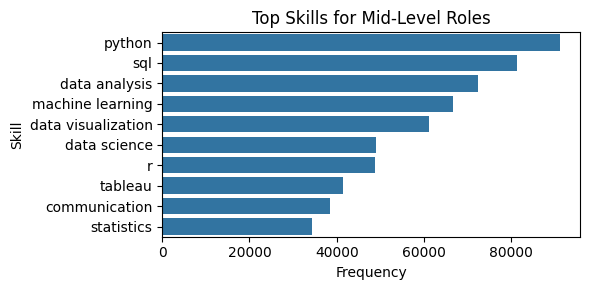

In [58]:
plt.figure(figsize=(6,3))
sns.barplot(
    data=Mid_skills,
    x='count',
    y='job_skills'
)
plt.title('Top Skills for Mid-Level Roles')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

##### Top skills for Senior

In [59]:
senior_skills = (
    skill_exp_counts[skill_exp_counts['experience'] == 'Senior']
    .sort_values(by='count', ascending=False)
    .head(10)
)

senior_skills

,experience,job_skills,count
69528,Senior,python,92425
71595,Senior,sql,84164
60151,Senior,data analysis,76846
65942,Senior,machine learning,65955
61051,Senior,data visualization,63925
69711,Senior,r,49577
60847,Senior,data science,47869
72413,Senior,tableau,43649
59212,Senior,communication,40046
71882,Senior,statistics,34436


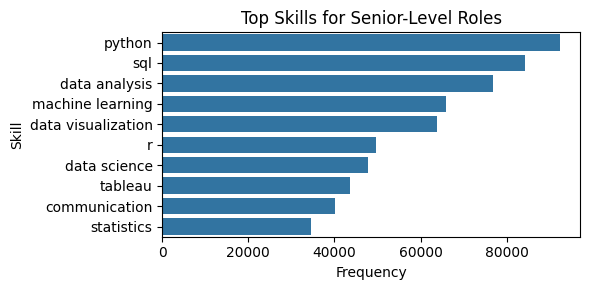

In [60]:
plt.figure(figsize=(6,3))
sns.barplot(
    data=senior_skills,
    x='count',
    y='job_skills'
)
plt.title('Top Skills for Senior-Level Roles')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

##### Which skills are most strongly associated with which roles (Data Analyst vs Data Scientist vs ML Engineer)

In [61]:
skill_role_counts = (
    skills_jobs
    .groupby(['job_skills', 'role'])
    .size()
    .reset_index(name='count')
)
skill_role_counts.head()

,job_skills,role,count
0,"""trustworthy ai""",Data Scientist,1
1,$3040 hourly pay,Data Analyst,1
2,$44/hr to $48/hr,Data Analyst,1
3,$45500 $48500 (potentially higher based on wor...,Data Analyst,1
4,$5560/hr contracttocontract,Data Analyst,1


In [62]:
top_skills = (
    skills_jobs['job_skills']
    .value_counts()
    .head(20)
    .index
)

skill_role_counts = skill_role_counts[
    skill_role_counts['job_skills'].isin(top_skills)
]

In [63]:
heatmap_data = skill_role_counts.pivot(
    index='job_skills',
    columns='role',
    values='count'
).fillna(0)

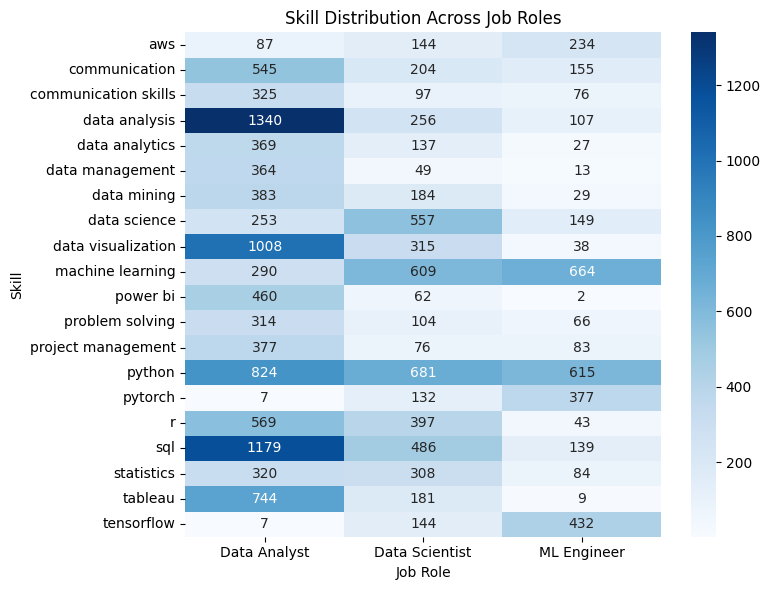

In [64]:
plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='Blues'
)
plt.title('Skill Distribution Across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

##### Salary by role and experience

In [65]:
# Normalize roles
def map_role(title):
    title = title.lower()
    if 'data analyst' in title:
        return 'Data Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'machine learning' in title or 'ml engineer' in title:
        return 'ML Engineer'
    else:
        return 'Other'

salaries['role'] = salaries['job_title'].apply(map_role)

In [66]:
# Drop “Other” to stay focused
salaries = salaries[salaries['role'] != 'Other']

##### Average (MEDIAN) salary by role

In [67]:
role_salary = (
    salaries
    .groupby('role')['salary_in_usd']
    .median()
    .sort_values(ascending=False)
)

role_salary

role
Data Scientist    104196.5
Data Analyst       87827.0
ML Engineer        87678.5
Name: salary_in_usd, dtype: float64

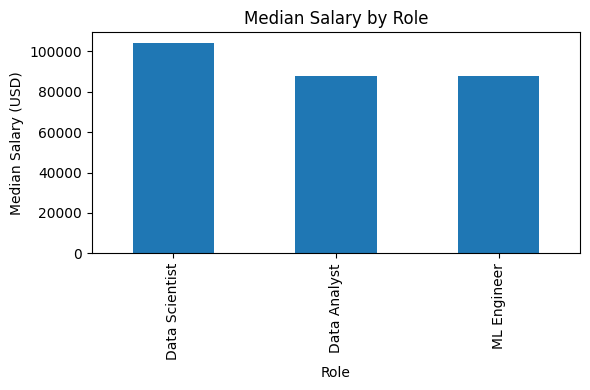

In [70]:
plt.figure(figsize=(6,4))
role_salary.plot(kind='bar')
plt.title('Median Salary by Role')
plt.ylabel('Median Salary (USD)')
plt.xlabel('Role')
plt.tight_layout()
plt.show()

##### Salary distribution by experience level

In [71]:
exp_map = {
    'EN': 'Entry',
    'MI': 'Mid',
    'SE': 'Senior',
    'EX': 'Executive'
}

salaries['experience'] = salaries['experience_level'].map(exp_map)

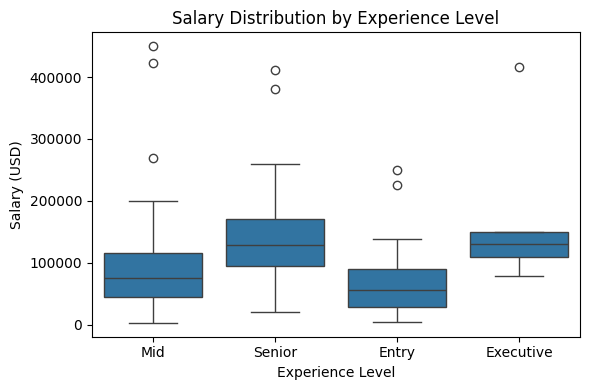

In [74]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=salaries,
    x='experience',
    y='salary_in_usd'
)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

##### Top-paying roles

In [75]:
top_roles = (
    salaries
    .groupby('role')['salary_in_usd']
    .median()
    .sort_values(ascending=False)
)

top_roles

role
Data Scientist    104196.5
Data Analyst       87827.0
ML Engineer        87678.5
Name: salary_in_usd, dtype: float64

##### Median salary analysis shows that ML Engineers tend to earn the highest compensation, followed by Data Scientists, with Data Analysts earning comparatively less. Salary distributions widen significantly with experience, indicating that seniority has a stronger impact on compensation than role alone.

##### Key Takeaways:
##### Python and SQL dominate skill demand across roles
##### Data Scientist and ML-related roles offer higher average salaries
##### Entry-level candidates should focus on core skills before specialization
##### Conclusion: This analysis highlights how aligning skill development with market demand can improve employability for entry-level data analysts.